In [1]:
# Install packages #
# !pip install numpy
# !pip install matplotlib
# !pip install torch
# !pip install xlrd
# !pip install pandas
# !pip install torchvision

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, transforms

In [3]:
# Loading training data
dataset = pd.read_csv("bmi_train.csv")
dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True) #Gender -> boolean
dataset = dataset.to_numpy()

# Splitting off 80% of data for training, 20% for validation
train_split = int(0.8 * len(dataset))
X_train = dataset[:train_split, [0,1,2]]
y_train = dataset[:train_split, 3]
X_test = dataset[train_split:, [0,1,2]]
y_test = dataset[train_split:, 3]

# Loading prediction data
prediction_dataset = pd.read_csv("bmi_validation.csv")
prediction_dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True) #Gender -> boolean
X_prediction = prediction_dataset.to_numpy()

# Normalize data set
X_train_normalized = (X_train - X_train.min(0)) / (X_train.max(0) - X_train.min(0))
X_test_normalized = (X_test - X_test.min(0)) / (X_test.max(0) - X_test.min(0))
X_prediction_normalized = (X_prediction - X_prediction.min(0)) / (X_prediction.max(0) - X_prediction.min(0))

# Turn data to tensor
X_train_tensor = torch.from_numpy(X_train_normalized)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test_normalized)
y_test_tensor = torch.from_numpy(y_test)
X_prediction_tensor = torch.from_numpy(X_prediction_normalized)

In [4]:
# Train and test error rate analysis function
def calculate_error_rate(X, y, w, b):
    num_samples = X.shape[0]
    y_pred = np.dot(X, w) + b
    y_pred = torch.round(torch.from_numpy(y_pred))
    error_count = torch.count_nonzero(y_pred - y)
    error_rate = error_count / num_samples
    return error_rate

Custom SGD

Learned parameters:
w0 = 0.060808857709234714
w1 = -2.1334616790571426
w2 = 3.847422443386162
b = 2.8643211189596514


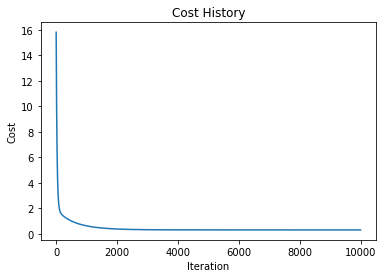

Train error rate: tensor(0.3812)
Test error rate: tensor(0.3625)


In [5]:
# Vanilia Gradient Descent Algorithms
def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    
    # Initialize weights and bias
    w = np.zeros(num_features)
    b = 0
    cost_history = []
    
    for _ in range(num_iterations):
        # Calculate predictions
        y_pred = np.dot(X, w) + b
        
        # Calculate the difference between predictions and actual values
        error = y_pred - y
        
        # Calculate the gradient
        w_gradient = (1/num_samples) * np.dot(X.T, error)
        b_gradient = (1/num_samples) * np.sum(error)
        
        # Update theta using the learning rate and gradient
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient
        
        # Calculate the cost (mean squared error)
        cost = np.mean(np.square(error))
        cost_history.append(cost)
    
    return w, b, cost_history

# Train the model using gradient descent
learning_rate = 0.01
num_iterations = 10000
w, b, cost_history = gradient_descent(X_train_normalized, y_train, learning_rate, num_iterations)

# Print the learned parameters
print("Learned parameters:")

for i, w_i in enumerate(w):
    print(f"w{i} =", w_i)
print("b =", b)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w, b)
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w, b)
    print("Test error rate:", test_error_rate)

Learned parameters:
w0 = 0.059983496550581133
w1 = -2.1378298844535375
w2 = 3.8459536565170858
b = 2.8665206461276247


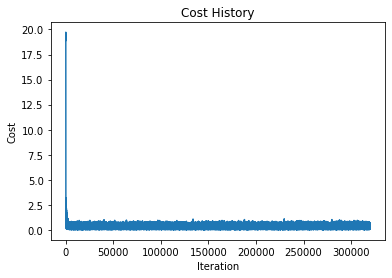

Train error rate: tensor(0.3781)
Test error rate: tensor(0.3625)


In [6]:
# Stochastic Gradien Descent Algorithms
def stochastic_gradient_descent(X, y, learning_rate, num_epochs, batch_size):
    num_samples, num_features = X.shape
    num_batches = num_samples // batch_size

    # Initialize weights and bias
    w = np.zeros(num_features)
    b = 0
    cost_history = []

    for epoch in range(num_epochs):
        # Shuffle the data for each epoch
        permutation = np.random.permutation(num_samples)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for batch in range(num_batches):
            # Select the current batch
            start = batch * batch_size
            end = (batch + 1) * batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Calculate predictions
            y_pred = np.dot(X_batch, w) + b

            # Calculate the difference between predictions and actual values
            error = y_pred - y_batch

            # Calculate the gradients
            w_gradient = (1 / batch_size) * np.dot(X_batch.T, error)
            b_gradient = (1 / batch_size) * np.sum(error)

            # Update weights and bias
            w -= learning_rate * w_gradient
            b -= learning_rate * b_gradient

            # Calculate the cost (mean squared error)
            cost = np.mean(np.square(error))
            cost_history.append(cost)
            
    return w, b, cost_history

# Train the model using stochastic gradient descent
learning_rate = 0.01
num_epochs = 10000
batch_size = 10
w, b, cost_history = stochastic_gradient_descent(X_train_normalized, y_train, learning_rate, num_epochs, batch_size)

# Print the learned parameters
print("Learned parameters:")
for i, w_i in enumerate(w):
    print(f"w{i} =", w_i)
print("b =", b)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w, b)
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w, b)
    print("Test error rate:", test_error_rate)

Pytorch SGD

Pytorch SGD Test (This is done by Chris for testing purpose)

Epoch [1/5000], Loss: 15.80624962
Epoch [10/5000], Loss: 8.95719337
Epoch [20/5000], Loss: 5.18171310
Epoch [30/5000], Loss: 3.37053919
Epoch [40/5000], Loss: 2.48795056
Epoch [50/5000], Loss: 2.04493523
Epoch [60/5000], Loss: 1.81057477
Epoch [70/5000], Loss: 1.67579579
Epoch [80/5000], Loss: 1.58904791
Epoch [90/5000], Loss: 1.52594018
Epoch [100/5000], Loss: 1.47490764
Epoch [110/5000], Loss: 1.43044233
Epoch [120/5000], Loss: 1.38989937
Epoch [130/5000], Loss: 1.35198796
Epoch [140/5000], Loss: 1.31605935
Epoch [150/5000], Loss: 1.28177118
Epoch [160/5000], Loss: 1.24892676
Epoch [170/5000], Loss: 1.21740115
Epoch [180/5000], Loss: 1.18710470
Epoch [190/5000], Loss: 1.15796685
Epoch [200/5000], Loss: 1.12992716
Epoch [210/5000], Loss: 1.10293210
Epoch [220/5000], Loss: 1.07693267
Epoch [230/5000], Loss: 1.05188298
Epoch [240/5000], Loss: 1.02774048
Epoch [250/5000], Loss: 1.00446510
Epoch [260/5000], Loss: 0.98201925
Epoch [270/5000], Loss: 0.96036673
Epoch [280/5000], Loss: 0.9394

Epoch [2580/5000], Loss: 0.30369076
Epoch [2590/5000], Loss: 0.30367091
Epoch [2600/5000], Loss: 0.30365160
Epoch [2610/5000], Loss: 0.30363280
Epoch [2620/5000], Loss: 0.30361456
Epoch [2630/5000], Loss: 0.30359682
Epoch [2640/5000], Loss: 0.30357957
Epoch [2650/5000], Loss: 0.30356276
Epoch [2660/5000], Loss: 0.30354643
Epoch [2670/5000], Loss: 0.30353060
Epoch [2680/5000], Loss: 0.30351517
Epoch [2690/5000], Loss: 0.30350021
Epoch [2700/5000], Loss: 0.30348563
Epoch [2710/5000], Loss: 0.30347148
Epoch [2720/5000], Loss: 0.30345768
Epoch [2730/5000], Loss: 0.30344430
Epoch [2740/5000], Loss: 0.30343124
Epoch [2750/5000], Loss: 0.30341858
Epoch [2760/5000], Loss: 0.30340627
Epoch [2770/5000], Loss: 0.30339429
Epoch [2780/5000], Loss: 0.30338269
Epoch [2790/5000], Loss: 0.30337134
Epoch [2800/5000], Loss: 0.30336031
Epoch [2810/5000], Loss: 0.30334961
Epoch [2820/5000], Loss: 0.30333918
Epoch [2830/5000], Loss: 0.30332905
Epoch [2840/5000], Loss: 0.30331919
Epoch [2850/5000], Loss: 0.3

Epoch [4910/5000], Loss: 0.30296263
Epoch [4920/5000], Loss: 0.30296260
Epoch [4930/5000], Loss: 0.30296254
Epoch [4940/5000], Loss: 0.30296251
Epoch [4950/5000], Loss: 0.30296245
Epoch [4960/5000], Loss: 0.30296239
Epoch [4970/5000], Loss: 0.30296236
Epoch [4980/5000], Loss: 0.30296236
Epoch [4990/5000], Loss: 0.30296227
Epoch [5000/5000], Loss: 0.30296227
Trained weights: tensor([ 0.0608, -2.1335,  3.8474], requires_grad=True)
Trained bias: tensor([2.8643], requires_grad=True)


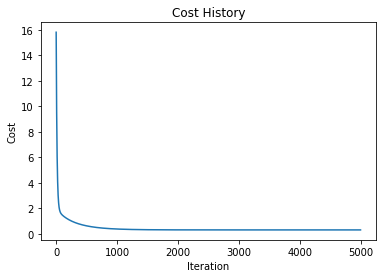

Train error rate: tensor(0.3812)
Test error rate: tensor(0.3625)


In [13]:
# Define the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 5000

# Define the number of features
num_features = X_train_tensor.size()[1]

# Define the model parameters (weights and bias)
w = torch.zeros(num_features, dtype=torch.float, requires_grad=True)
# w = torch.tensor([1., 1., 1.], requires_grad=True)
b = torch.zeros(1, dtype=torch.float, requires_grad=True)
# b = torch.tensor([1.], requires_grad=True)
cost_history = []

# Define the loss function
criterion = torch.nn.MSELoss()

# Define the optimizer (Vanilla Gradient Descent)
optimizer = torch.optim.SGD([w, b], lr=learning_rate, weight_decay=0)

# Perform gradient descent
for epoch in range(num_epochs):
    # Forward pass
    outputs = torch.matmul(X_train_tensor.float(), w) + b
    loss = criterion(outputs, y_train_tensor.float())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the loss
    cost_history.append(loss.detach().numpy())
    
    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')
        

# Print learned parameters
print('Trained weights:', w)
print('Trained bias:', b)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w.detach().numpy(), b.detach().numpy())
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w.detach().numpy(), b.detach().numpy())
    print("Test error rate:", test_error_rate)

Neural Network

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (activation_stack): Sequential(
    (0): Linear(in_features=3, out_features=1, bias=True)
  )
)
Epoch [1/5000], Loss: 17.65631294
Epoch [10/5000], Loss: 9.74049568
Epoch [20/5000], Loss: 5.38651800
Epoch [30/5000], Loss: 3.30731153
Epoch [40/5000], Loss: 2.30308795
Epoch [50/5000], Loss: 1.80739093
Epoch [60/5000], Loss: 1.55274749
Epoch [70/5000], Loss: 1.41283226
Epoch [80/5000], Loss: 1.32795680
Epoch [90/5000], Loss: 1.26989341
Epoch [100/5000], Loss: 1.22527003
Epoch [110/5000], Loss: 1.18773103
Epoch [120/5000], Loss: 1.15423524
Epoch [130/5000], Loss: 1.12330937
Epoch [140/5000], Loss: 1.09422243
Epoch [150/5000], Loss: 1.06659698
Epoch [160/5000], Loss: 1.04022360
Epoch [170/5000], Loss: 1.01497483
Epoch [180/5000], Loss: 0.99076378
Epoch [190/5000], Loss: 0.96752387
Epoch [200/5000], Loss: 0.94520015
Epoch [210/5000], Loss: 0.92374480
Epoch [220/5000], Loss: 0.90311396
Epoch [230/5000], Loss: 0.88326770
Epoch [240/

Epoch [2530/5000], Loss: 0.30356345
Epoch [2540/5000], Loss: 0.30354673
Epoch [2550/5000], Loss: 0.30353042
Epoch [2560/5000], Loss: 0.30351466
Epoch [2570/5000], Loss: 0.30349928
Epoch [2580/5000], Loss: 0.30348444
Epoch [2590/5000], Loss: 0.30346990
Epoch [2600/5000], Loss: 0.30345577
Epoch [2610/5000], Loss: 0.30344212
Epoch [2620/5000], Loss: 0.30342883
Epoch [2630/5000], Loss: 0.30341589
Epoch [2640/5000], Loss: 0.30340335
Epoch [2650/5000], Loss: 0.30339113
Epoch [2660/5000], Loss: 0.30337930
Epoch [2670/5000], Loss: 0.30336776
Epoch [2680/5000], Loss: 0.30335659
Epoch [2690/5000], Loss: 0.30334568
Epoch [2700/5000], Loss: 0.30333510
Epoch [2710/5000], Loss: 0.30332482
Epoch [2720/5000], Loss: 0.30331486
Epoch [2730/5000], Loss: 0.30330512
Epoch [2740/5000], Loss: 0.30329567
Epoch [2750/5000], Loss: 0.30328652
Epoch [2760/5000], Loss: 0.30327755
Epoch [2770/5000], Loss: 0.30326891
Epoch [2780/5000], Loss: 0.30326048
Epoch [2790/5000], Loss: 0.30325228
Epoch [2800/5000], Loss: 0.3

Epoch [4910/5000], Loss: 0.30296192
Epoch [4920/5000], Loss: 0.30296189
Epoch [4930/5000], Loss: 0.30296189
Epoch [4940/5000], Loss: 0.30296183
Epoch [4950/5000], Loss: 0.30296183
Epoch [4960/5000], Loss: 0.30296177
Epoch [4970/5000], Loss: 0.30296177
Epoch [4980/5000], Loss: 0.30296174
Epoch [4990/5000], Loss: 0.30296174
Epoch [5000/5000], Loss: 0.30296168
activation_stack.0.weight: tensor([[ 0.0607, -2.1342,  3.8471]])
activation_stack.0.bias: tensor([2.8650])


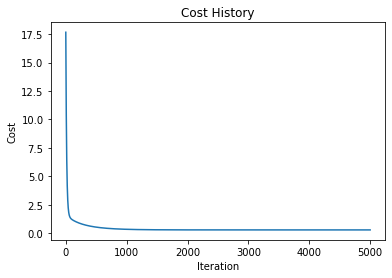

In [14]:
# Define a custom neural network class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.activation_stack = nn.Sequential(
            nn.Linear(3, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.activation_stack(x)
        return torch.squeeze(logits)
    
# Define the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 5000

# Define the model parameters
cost_history = []

# Create an instance of the neural network
criterion = torch.nn.MSELoss()
NeuralNetwork_model = NeuralNetwork()
print(NeuralNetwork_model)
optimizer = torch.optim.SGD(NeuralNetwork_model.parameters(), lr=learning_rate, weight_decay = 0)

#for name, param in NeuralNetwork_model.named_parameters():
#    print( name )
#    values = torch.ones( param.shape )
#    param.data = values
    
# Perform training
for epoch in range(num_epochs):
    # Forward propagation to obtain the predicted output
    outputs = NeuralNetwork_model(X_train_tensor.float())
    
    # Calculate the loss
    loss = criterion(outputs, y_train_tensor.float())
    
    # Backward propagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record the loss
    cost_history.append(loss.item())
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')
        
# Print learned parameters
for name, param in NeuralNetwork_model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')
        
        
# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
# train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w.T.detach().numpy(), b.detach().numpy())
# print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
# if X_test is not None and y_test is not None:
#    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w.T.detach().numpy(), b.detach().numpy())
#    print("Test error rate:", test_error_rate)